In [1]:
import discord
import os
from dotenv import load_dotenv

from api_keys import *
from command_handling import *

from DESTINY import basics
from DESTINY import manifestation
from DESTINY import hbfunc

from selenium import webdriver

import bs4
import urllib

import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

import json
import requests
import shutil

In [2]:
all_data = manifestation.get_all_data(regen=False)

Not regenerating manifest


In [3]:
weapon_dict = manifestation.get_weapon_dict(all_data)

In [4]:
perk_dict = manifestation.get_perk_dict(all_data)

In [5]:
for ep in all_data.keys():
    print(ep)

DestinyPlaceDefinition
DestinyActivityDefinition
DestinyActivityTypeDefinition
DestinyClassDefinition
DestinyGenderDefinition
DestinyInventoryBucketDefinition
DestinyRaceDefinition
DestinyTalentGridDefinition
DestinyUnlockDefinition
DestinyMaterialRequirementSetDefinition
DestinySandboxPerkDefinition
DestinyStatGroupDefinition
DestinyFactionDefinition
DestinyVendorGroupDefinition
DestinyRewardSourceDefinition
DestinyItemCategoryDefinition
DestinyDamageTypeDefinition
DestinyActivityModeDefinition
DestinyMedalTierDefinition
DestinyAchievementDefinition
DestinyActivityGraphDefinition
DestinyBondDefinition
DestinyCollectibleDefinition
DestinyDestinationDefinition
DestinyEquipmentSlotDefinition
DestinyStatDefinition
DestinyInventoryItemDefinition
DestinyItemTierTypeDefinition
DestinyLocationDefinition
DestinyLoreDefinition
DestinyMetricDefinition
DestinyObjectiveDefinition
DestinyPlugSetDefinition
DestinyPowerCapDefinition
DestinyPresentationNodeDefinition
DestinyProgressionDefinition
Desti

In [6]:
def find_id(search_id):
    for key in all_data.keys():
        if search_id in all_data[key].keys():
            print(key, "\n", json.dumps(all_data[key][search_id], indent=4))

## Word cloud for TWAB's idea

In [11]:
import requests
import wordcloud

In [151]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
from bs4 import BeautifulSoup
from datetime import date
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

from nltk.stem.porter import PorterStemmer

In [13]:
test_df = pd.DataFrame({"fruit":['apple','apple','banana','apple','pear', 'banana'],
                        "weight":[5, 6, 9, 4, 3, 7]})
test_df

,fruit,weight
0,apple,5
1,apple,6
2,banana,9
3,apple,4
4,pear,3
5,banana,7


In [286]:
r = requests.get("https://www.bungie.net/en-us/Explore/Detail/News/51813")
#r = requests.get("https://www.bungie.net/en/Explore/Detail/News/51779")
#r = requests.get("https://www.bungie.net/en/Explore/Detail/News/51747")
#r = requests.get("https://www.bungie.net/en/Explore/Detail/News/50176")

In [287]:
soup = BeautifulSoup(r.text, 'html.parser')

In [288]:
today = date.today()
today_str = str(today).replace("-","/")

In [289]:
today

datetime.date(2022, 10, 11)

In [290]:
str(date(2022, 9, 11)) # nice, leading zero is present

'2022-09-11'

In [291]:
# will adjust to be last thursday
today = str(date.today())

today_list = today.split("-")
today_str = today_list[1] + "/" + today_list[2] + "/" + today_list[0]
today_str

'10/11/2022'

In [293]:
today_str = "10/06/2022"

In [294]:
ord("–"), ord("-")

(8211, 45)

In [295]:
"–" == "-"

False

In [296]:
for s in soup.strings:
    s_str = str(s)
    if len(s_str)>2:
        txt = s_str.split()
        block = " ".join(txt)
        if start is False:
            if block.lower() in ["this week at bungie - "+today_str, "this week at bungie – "+today_str ]:
                print(block)


### NOTE: They're not consistent with their date formats

In [310]:
obvious_words = ["this", "week", "bungie","destiny", "player", "game", "dont", "does"]

## If the following gives an empty counter as a result, likely the date is not formatted correctly (they are inconsistent, we might have to try a few different spellings, i.e. 1/01/22 vs 01/01/2022, etc.

In [311]:
start = False
words = []
stemmer = PorterStemmer()

for s in soup.strings:
    s_str = str(s)
    if len(s_str)>2:
        txt = s_str.split()
        block = " ".join(txt)
        if start is False:
            if block.lower() in ["this week at bungie - "+today_str, "this week at bungie – "+today_str ]:
                start = True
                continue
        else:
            block = block.replace("-", " ")
            res = re.sub(r'[^\w\s]', '', block)
            txt = res.split()
            #stemmed = [stemmer.stem(w) for w in txt]
            #[words.append(stemmer.stem(word.lower())) for word in txt if (len(word)>2) & (word.lower() not in ENGLISH_STOP_WORDS) & (word.lower() not in obvious_words)]
            [words.append(word.lower()) for word in txt if (len(word)>2) & (word.lower() not in ENGLISH_STOP_WORDS)]

            
ctr = dict(Counter(words))

for k,v in ctr.items():
    if k[-1] == "s":
        if k[:-1] in (ctr.keys()):
            ctr[k[:-1]] += v
            ctr[k] = -1
            
for k, v in ctr.items():
    if k in obvious_words:
        ctr[k] = -1
            
ctr = Counter(ctr)
ctr

Counter({'oct': 1,
         '2022': 7,
         'hippy': 4,
         'week': -1,
         'bungie': -1,
         'talking': 3,
         'upcoming': 2,
         'material': 1,
         'changes': -1,
         'diving': 1,
         'deep': 1,
         'player': -1,
         'submitted': 1,
         'questions': 6,
         'weapons': -1,
         'team': 15,
         'addressing': 1,
         'misinformation': 2,
         'floating': 1,
         'regarding': 3,
         'recent': 7,
         'account': 9,
         'bans': -1,
         'whats': 4,
         'thats': 4,
         'sound': 1,
         'excitable': 1,
         'horizon': 1,
         'need': 3,
         'wondering': 2,
         'glad': 1,
         'did': 4,
         'parts': 1,
         'immediate': 2,
         'future': 9,
         'able': 5,
         'share': 4,
         'closer': 3,
         'look': 5,
         'economic': 1,
         'coming': 6,
         'destiny': -1,
         'season': 21,
         'bigger': 1,
         

In [312]:
ctr.most_common(35)

[('weapon', 82),
 ('perk', 48),
 ('rifle', 30),
 ('season', 21),
 ('damage', 20),
 ('exotic', 20),
 ('change', 19),
 ('raid', 18),
 ('new', 16),
 ('time', 16),
 ('team', 15),
 ('issue', 15),
 ('auto', 14),
 ('make', 13),
 ('increase', 12),
 ('going', 12),
 ('like', 12),
 ('accuracy', 12),
 ('small', 11),
 ('shot', 11),
 ('frame', 11),
 ('number', 10),
 ('trigger', 10),
 ('plan', 10),
 ('aim', 10),
 ('assist', 10),
 ('account', 9),
 ('future', 9),
 ('come', 9),
 ('lot', 9),
 ('precision', 9),
 ('looking', 8),
 ('ban', 8),
 ('divinity', 8),
 ('stat', 8)]

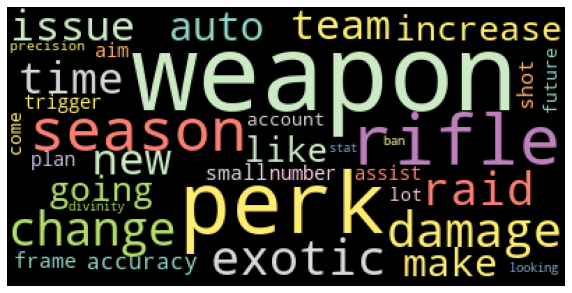

In [313]:
wordcloud = WordCloud(colormap="Set3")
wordcloud.fit_words(dict(ctr.most_common(35)))
fig=plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## ok cool, might be good.  I'll test it on the next TWAB to see